In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [2]:
url=r'https://raw.githubusercontent.com/anantdivanji/LearnDigital-/main/4th%20Sem/Social_Network_Ads.csv'

In [3]:
dt=pd.read_csv(url)
dt.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
dt.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=dt.drop(columns='Purchased')

In [12]:
y=dt['Purchased']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN

KNeighborsClassifier()

In [47]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred=KNN.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[46,  8],
       [ 6, 20]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.825

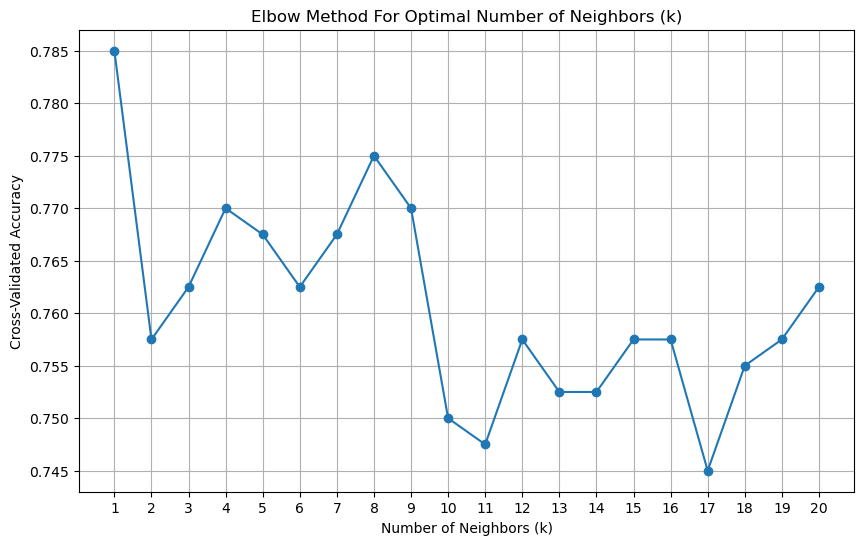

The optimal number of neighbors is 1


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


# Features and target variable
X = dt[['Age', 'EstimatedSalary']]
y = dt['Purchased']

# List to store cross-validated scores
cv_scores = []

# Range of k values to try
range_k = range(1, 21)

# Perform 5-fold cross-validation for each value of k
for k in range_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting the performance for different k values
plt.figure(figsize=(10, 6))
plt.plot(range_k, cv_scores, marker='o')
plt.title('Elbow Method For Optimal Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(range_k)
plt.grid(True)
plt.show()

# Find the optimal k (maximum cross-validated accuracy)
optimal_k = range_k[np.argmax(cv_scores)]
print(f'The optimal number of neighbors is {optimal_k}')
